In [279]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data and Organize Timeseries

In [280]:
d = pd.read_csv('covid-19-data/us-counties.csv')

counties = [
    # county, state, population
    # all populations based on Wikipedia 2020 estimates
    ('New York City', 'New York', 8398748),
    ('Los Angeles', 'California', 10105518),
    ('Cook', 'Illinois', 5150233), # Chicago
    ('King', 'Washington', 753675), # Seattle
    ('San Francisco', 'California', 881549),
    ('San Diego', 'California', 3338330),
]

cases_tot_series, cases_by_pop_series = [], []
deaths_tot_series, deaths_by_pop_series = [], []
for c in counties:
    county, state, pop = c
    colname = f"{county}, {state}"
    c_filter = d.county.eq(county) & d.state.eq(state)
    
    # cases
    cases_tot = d[c_filter].set_index('date').filter(items=['cases']).rename(columns={'cases': colname})
    cases_by_pop = cases_tot[colname] / (pop / 1000)
    cases_tot_series.append(cases_tot)
    cases_by_pop_series.append(cases_by_pop)
    
    # deaths
    deaths_tot = d[c_filter].set_index('date').filter(items=['deaths']).rename(columns={'deaths': colname})
    deaths_by_pop = deaths_tot[colname] / (pop / 1000)
    deaths_tot_series.append(deaths_tot)
    deaths_by_pop_series.append(deaths_by_pop)

# assemble all the series into new dataframes -- each county is a column
# cases
cases_tot_df = pd.concat(cases_tot_series, axis=1).sort_index()
cases_by_pop_df = pd.concat(cases_by_pop_series, axis=1).sort_index()
# deaths
deaths_tot_df = pd.concat(deaths_tot_series, axis=1).sort_index()
deaths_by_pop_df = pd.concat(deaths_by_pop_series, axis=1).sort_index()

# Table of Cases

In [281]:
cases_tot_df

,"New York City, New York","Los Angeles, California","Cook, Illinois","King, Washington","San Francisco, California","San Diego, California"
2020-01-24,NaN,NaN,1,NaN,NaN,NaN
2020-01-25,NaN,NaN,1,NaN,NaN,NaN
2020-01-26,NaN,1.0,1,NaN,NaN,NaN
2020-01-27,NaN,1.0,1,NaN,NaN,NaN
2020-01-28,NaN,1.0,1,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-21,217189.0,83397.0,87177,9236.0,3061.0,10857.0
2020-06-22,217487.0,85942.0,87424,9275.0,3188.0,11159.0
2020-06-23,217803.0,88262.0,87784,9371.0,3222.0,11357.0
2020-06-24,218089.0,89490.0,88138,9504.0,3252.0,11689.0


# Table of Deaths

In [282]:
deaths_tot_df

,"New York City, New York","Los Angeles, California","Cook, Illinois","King, Washington","San Francisco, California","San Diego, California"
2020-01-24,NaN,NaN,0,NaN,NaN,NaN
2020-01-25,NaN,NaN,0,NaN,NaN,NaN
2020-01-26,NaN,0.0,0,NaN,NaN,NaN
2020-01-27,NaN,0.0,0,NaN,NaN,NaN
2020-01-28,NaN,0.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-21,21753.0,3120.0,4404,602.0,47.0,338.0
2020-06-22,21796.0,3137.0,4423,604.0,48.0,338.0
2020-06-23,21817.0,3171.0,4439,606.0,48.0,341.0
2020-06-24,21838.0,3205.0,4478,606.0,48.0,347.0


In [283]:
def show_graphs(data, title, logy, avg_days):    
    figsize = (10, 6)
    if avg_days > 1:
        data = data.copy().rolling(window=avg_days).mean()

    scale_note = "log" if logy else "linear"
    maybe_avg_note = f", {avg_days} rolling avg" if avg_days > 1 else ""
    full_title_per_day = f"{title} per day ({scale_note}{maybe_avg_note})"
    full_title_cum = f"{title} cumulative ({scale_note}{maybe_avg_note})"
    data.diff().plot(figsize=figsize, rot=45, grid=True, logy=logy, title=full_title_per_day)
    data.plot(figsize=figsize, rot=45, grid=True, logy=logy, title=full_title_cum)

# Total cases

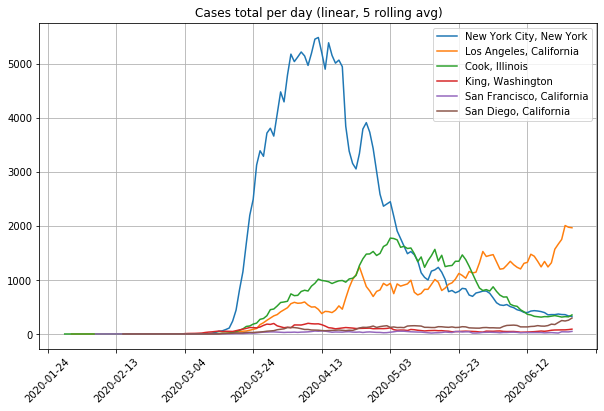

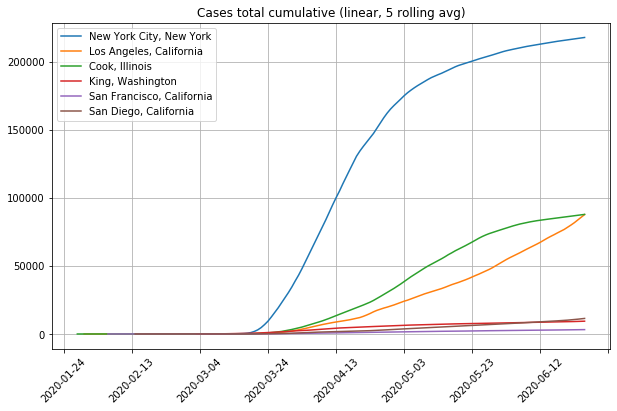

In [284]:
show_graphs(cases_tot_df, "Cases total", False, 5)

# Cases per 1000 people

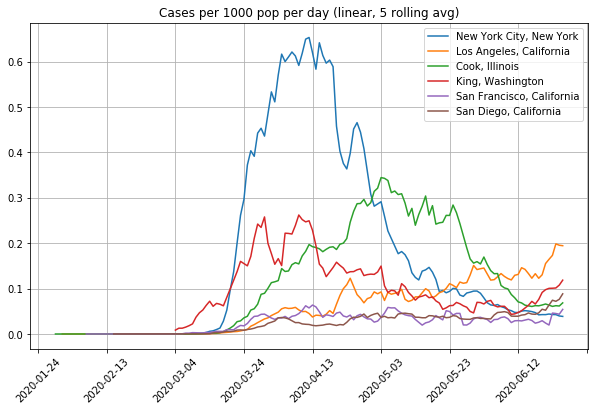

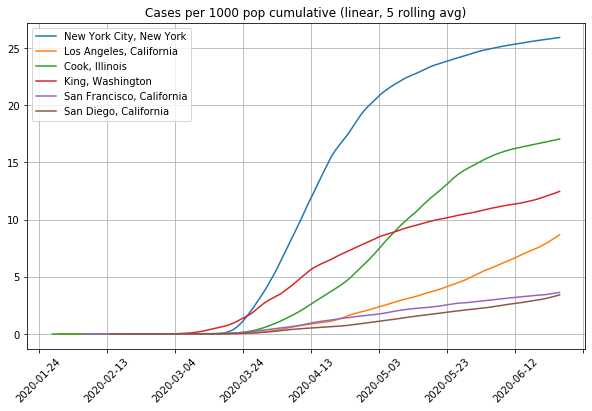

In [285]:
show_graphs(cases_by_pop_df, "Cases per 1000 pop", False, 5)

# Total deaths

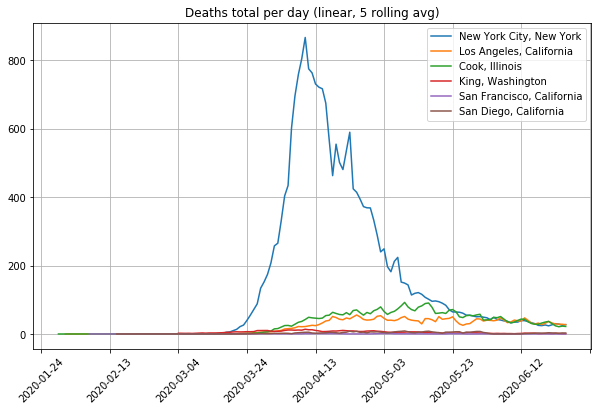

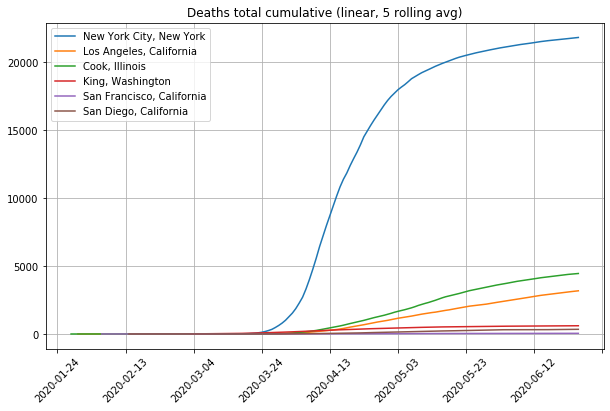

In [286]:
show_graphs(deaths_tot_df, "Deaths total", False, 5)

# Deaths per 1000 people

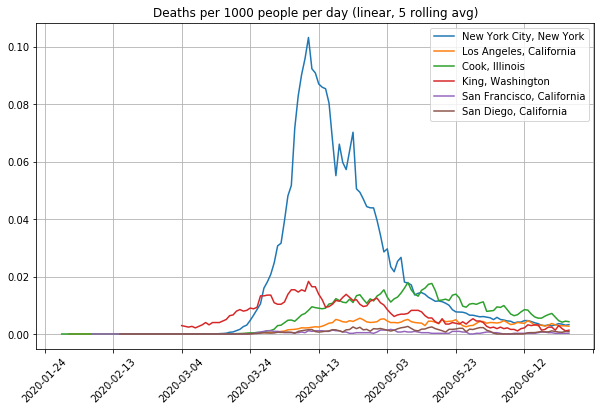

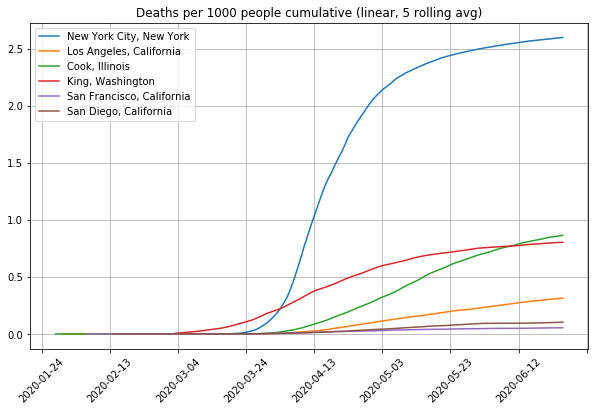

In [287]:
show_graphs(deaths_by_pop_df, "Deaths per 1000 people", False, 5)